# [LAB3] Tutorial PyTorch:

    3) Classificação Binária

## Importação de Bibliotecas

### Objetivo

Neste notebook, você irá aprender a utilizar o PyTorch para resolver problemas de **classificação binária**. Ao final, será capaz de construir modelos simples e interpretar seus resultados.

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Parte 3 – Classificação Binária (Separação de duas classes no plano 2D)

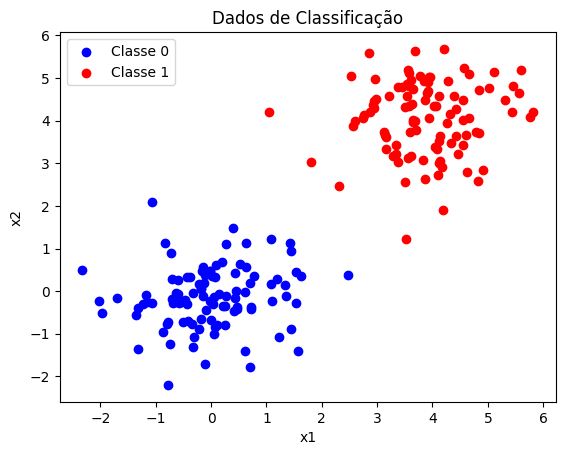

In [ ]:
# Geração de dados sintéticos
n = 100
x_class0 = torch.randn(n, 2) * 0.8 + torch.tensor([0.0, 0.0])
x_class1 = torch.randn(n, 2) * 0.8 + torch.tensor([4.0, 4.0])
x = torch.cat([x_class0, x_class1], dim=0)
y = torch.cat([torch.zeros(n), torch.ones(n)]).unsqueeze(1)

plt.scatter(x[:n,0], x[:n,1], color='blue', label='Classe 0')
plt.scatter(x[n:,0], x[n:,1], color='red', label='Classe 1')
plt.legend()
plt.title("Dados de Classificação")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [ ]:
# Modelo de classificação
class ModeloClassificacao(nn.Module):
    def __init__(self):
        super(ModeloClassificacao, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 1),
            # nn.ReLU(),
            # nn.Linear(8, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

In [ ]:
modelo = ModeloClassificacao()
criterio = nn.BCELoss()
otimizador = torch.optim.Adam(modelo.parameters(), lr=0.01)

for epoca in range(300):
    saida = modelo(x)
    perda = criterio(saida, y)

    otimizador.zero_grad()
    perda.backward()
    otimizador.step()

    if (epoca + 1) % 10 == 0:
        pred = (saida > 0.5).float()
        acc = (pred == y).float().mean()
        print(f'Época {epoca+1}, Perda: {perda.item():.4f}, Acurácia: {acc:.4f}')

Época 10, Perda: 0.8134, Acurácia: 0.3200
Época 20, Perda: 0.6337, Acurácia: 0.6300
Época 30, Perda: 0.5227, Acurácia: 0.7200
Época 40, Perda: 0.4480, Acurácia: 0.7850
Época 50, Perda: 0.3937, Acurácia: 0.8700
Época 60, Perda: 0.3517, Acurácia: 0.9100
Época 70, Perda: 0.3177, Acurácia: 0.9400
Época 80, Perda: 0.2895, Acurácia: 0.9550
Época 90, Perda: 0.2655, Acurácia: 0.9550
Época 100, Perda: 0.2448, Acurácia: 0.9600
Época 110, Perda: 0.2269, Acurácia: 0.9650
Época 120, Perda: 0.2111, Acurácia: 0.9650
Época 130, Perda: 0.1971, Acurácia: 0.9750
Época 140, Perda: 0.1847, Acurácia: 0.9800
Época 150, Perda: 0.1736, Acurácia: 0.9800
Época 160, Perda: 0.1636, Acurácia: 0.9800
Época 170, Perda: 0.1546, Acurácia: 0.9800
Época 180, Perda: 0.1464, Acurácia: 0.9900
Época 190, Perda: 0.1390, Acurácia: 0.9950
Época 200, Perda: 0.1322, Acurácia: 0.9950
Época 210, Perda: 0.1259, Acurácia: 0.9950
Época 220, Perda: 0.1202, Acurácia: 1.0000
Época 230, Perda: 0.1149, Acurácia: 1.0000
Época 240, Perda: 0.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def plotar_fronteira_decisao(modelo, x, y, title="Superfície de Decisão"):
    modelo.eval()  # Modo avaliação
    x_np = x.numpy()
    y_np = y.numpy().ravel()

    # Criar uma grade de pontos no espaço 2D
    x_min, x_max = x_np[:, 0].min() - 1, x_np[:, 0].max() + 1
    y_min, y_max = x_np[:, 1].min() - 1, x_np[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Transformar a grade em tensor (200x200 → 40000x2)
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

    # Obter predições da rede (probabilidades)
    with torch.no_grad():
        zz = modelo(grid)
        zz = zz.reshape(xx.shape).numpy()

    # Plotar contorno da fronteira de decisão
    plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], alpha=0.3, colors=['blue', 'red'])

    # Plotar os dados originais
    plt.scatter(x_np[y_np==0, 0], x_np[y_np==0, 1], color='blue', label='Classe 0')
    plt.scatter(x_np[y_np==1, 0], x_np[y_np==1, 1], color='red', label='Classe 1')
    plt.legend()
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()


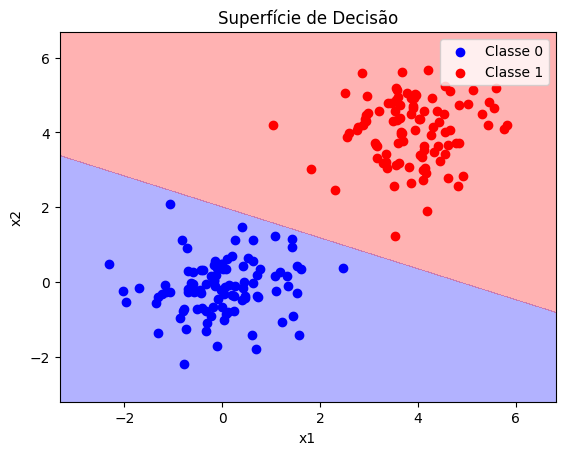

In [ ]:
plotar_fronteira_decisao(modelo, x, y, title="Superfície de Decisão")

### Exercício 3

a) Modifique a posição dos centros das classes para `[0, 0]` e `[2, 2]` e observe como isso afeta a separação. A rede ainda consegue classificar bem?

b) **Pergunta de reflexão**: O que aconteceria se removêssemos a função `Sigmoid()` da última camada no modelo de classificação binária? Tente e justifique sua resposta com base na função de perda `BCELoss`.

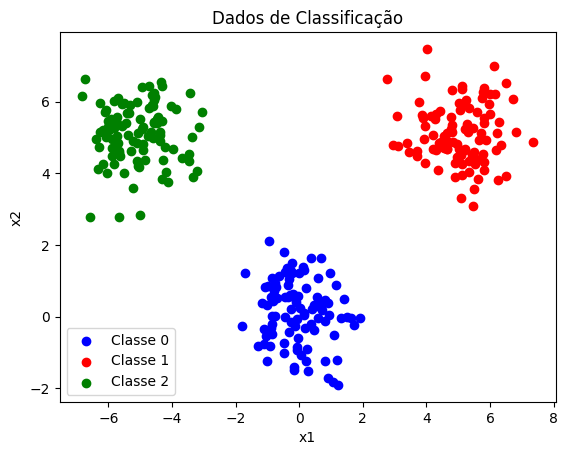

In [ ]:
# Geração de dados sintéticos
n = 100
x_class0 = torch.randn(n, 2) * 0.8 + torch.tensor([0.0, 0.0])
x_class1 = torch.randn(n, 2) * 0.8 + torch.tensor([5.0, 5.0])
x_class2 = torch.randn(n, 2) * 0.8 + torch.tensor([-5.0, 5.0])

x = torch.cat([x_class0, x_class1, x_class2], dim=0)
y = torch.cat([torch.zeros(n), torch.ones(n), 2*torch.ones(n)]).unsqueeze(1)

plt.scatter(x[:n,0], x[:n,1], color='blue', label='Classe 0')
plt.scatter(x[n:2*n,0], x[n:2*n,1], color='red', label='Classe 1')
plt.scatter(x[2*n:,0], x[2*n:,1], color='green', label='Classe 2')

plt.legend()
plt.title("Dados de Classificação")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [ ]:
# PARA CASA: TERMINAR O CÓDIGO PARA O CLASSIFICADOR MULTICLASSE
